In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

Consider the Rosenbrock function
$$f(x,y)=10(y-x^2)^2 + (1-x)^2$$
with gradient
$$\nabla f = \left[\begin{array}{c}
40x^3 - 40xy +2x - 2 \\\
20(y-x^2)
\end{array}\right]$$
and Hessian
$$\nabla^2 f = \left[
\begin{array}{c}
120x^2-40y+2 & -40x \\\
-40x & 20
\end{array}\right]$$
The only minimum is at $(x,y)=(1,1)$ where $f(1,1)=0$.

In [22]:
def objfun(x,y):
    return 100*(y-x**2)**2 + (1-x)**2
def gradient(x,y):
    return np.array([-40*x*y + 40*x**3 -2 + 2*x, 20*(y-x**2)])
def hessian(x,y):
    return np.array([[120*x*x - 40*y+2, -40*x],[-40*x, 20]])

Create a utility function that plots the contours of the Rosenbrock function.

In [33]:
def contourplot(objfun, xmin, xmax, ymin, ymax, ncontours=50, fill=True):

    x = np.linspace(xmin, xmax, 300)
    y = np.linspace(ymin, ymax, 300)
    X, Y = np.meshgrid(x,y)
    Z = objfun(X,Y)
    if fill:
        plt.contourf(X,Y,Z,ncontours); # plot the contours
    else:
        plt.contour(X,Y,Z,ncontours); # plot the contours
    plt.scatter(1,1,marker="x",s=50,color="r");  # mark the minimum

Here is a contour plot of the Rosenbrock function, with the global minimum marked with a red cross.

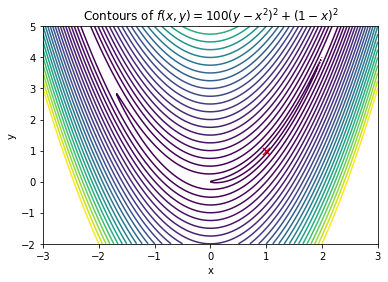

In [34]:
conts = sorted(set([objfun(2,y) for y in np.arange(-2,5,0.25)]))
contourplot(objfun, -3,3, -2, 5, ncontours=conts,fill=False)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Contours of $f(x,y)=100(y-x^2)^2 + (1-x)^2$");

# Coordinate descent with fixed step length

First we write a function that uses the coordinate descent method. Initializes the solution at position `init`, moves along each dimension using the gradient vector with steps `steplength`, until the absolute difference between function values drops below `tolerance` or until the number of iterations exceeds `maxiter`.

The function returns the array of all intermediate positions, and the array of function values.

In [88]:
def coordinatedescent(objfun, gradient, init, dim=2, tolerance=1e-6, maxiter=10000, steplength=0.01):
    p = np.array(init)
    iterno=0
    endflag = False
    parray = [p]
    fprev = objfun(p[0],p[1])
    farray = [fprev]
    eye = np.eye(dim)
    while iterno < maxiter: # main loop
        for d in range(dim): # loop over dimensions
            g = gradient(p[0],p[1])
            p = p - steplength*g[d]*eye[d]
            fcur = objfun(p[0], p[1])
            parray.append(p)
            farray.append(fcur)
            

        if abs(fcur-fprev)<tolerance:
            break
        fprev = fcur
        iterno += 1
    return np.array(parray), np.array(farray)

Now let's see how the coordinate descent method behaves with the Rosenbrock function.

In [91]:
p, f = coordinatedescent(objfun, gradient, init=[2,4], steplength=0.005,maxiter=10000)

Plot the convergence of the solution. Left: The solution points (white) superposed on the contour plot. The star indicates the initial point. Right: The objective function value at each iteration.

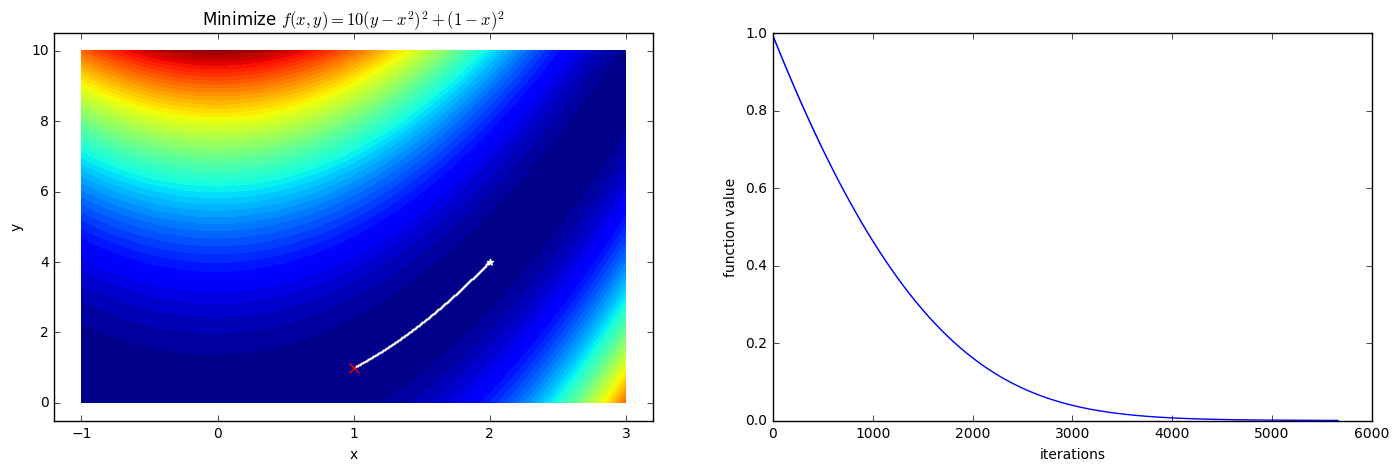

In [92]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
contourplot(objfun, -1,3,0,10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Minimize $f(x,y)=10(y-x^2)^2 + (1-x)^2$");
plt.scatter(p[0,0],p[0,1],marker="*",color="w")
for i in range(1,len(p)):    
        plt.plot( (p[i-1,0],p[i,0]), (p[i-1,1],p[i,1]) , "w");

plt.subplot(1,2,2)
plt.plot(f)
plt.xlabel("iterations")
plt.ylabel("function value");

Suppose we increase the step size from $\alpha=0.005$ to $\alpha=0.01$, and the trajectory of the solution gets weird.

In [89]:
p, f = coordinatedescent(objfun, gradient, init=[2,4], steplength=0.01,maxiter=500)

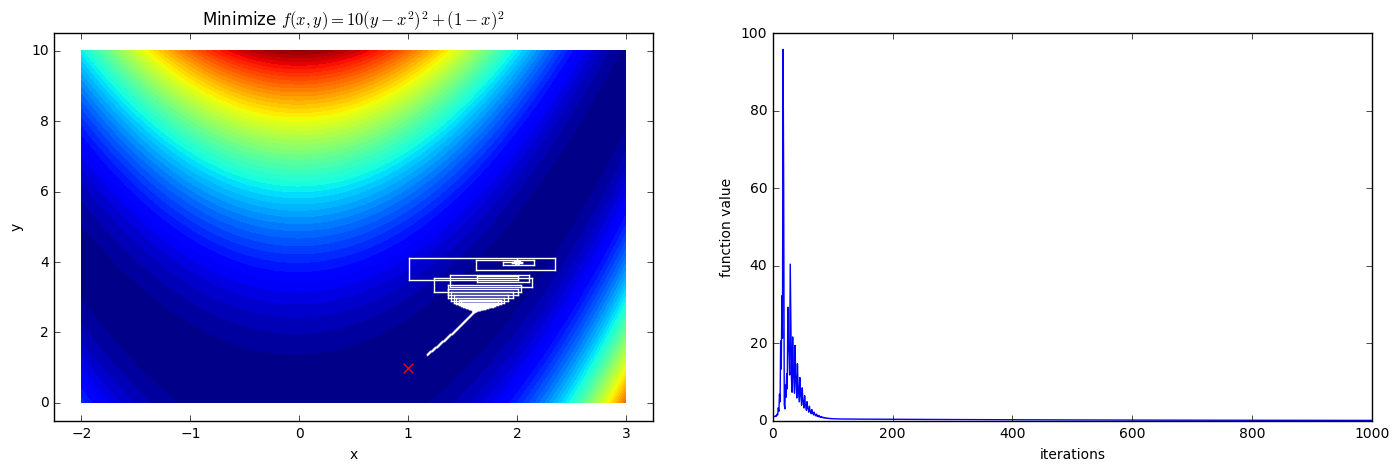

In [90]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
contourplot(objfun, -2,3,0,10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Minimize $f(x,y)=10(y-x^2)^2 + (1-x)^2$");
plt.scatter(p[0,0],p[0,1],marker="*",color="w")
for i in range(1,len(p)):    
        plt.plot( (p[i-1,0],p[i,0]), (p[i-1,1],p[i,1]) , "w");

plt.subplot(1,2,2)
plt.plot(f)
plt.xlabel("iterations")
plt.ylabel("function value");

Now the step size is larger, so the new position ends up in a location where the gradient is larger. Therefore the next step is even larger, and we observe a large jump across the middle hill. There the steps get smaller again, and the solution approaches the global minimum from the back.

Try a different starting location, where the gradient is larger. Now, the same $\alpha$ is too large; the step size increases at each iteration and the calculation blows up.

In [94]:
p, f = coordinatedescent(objfun, gradient, init=[2,6], steplength=0.01)

/home/kaan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/home/kaan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in double_scalars
/home/kaan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars
/home/kaan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in multiply


We see that the function value increases rapidly at each iteration. The algorithm is unstable.

In [95]:
f

array([  41.        ,  471.2894896 ,  304.02157734, ...,           nan,
                 nan,           nan])

However, when $\alpha$ is decreased to $0.005$ again, we see that the solution converges after some oscillations.

In [100]:
p, f = coordinatedescent(objfun, gradient, init=[2,6], steplength=0.005)

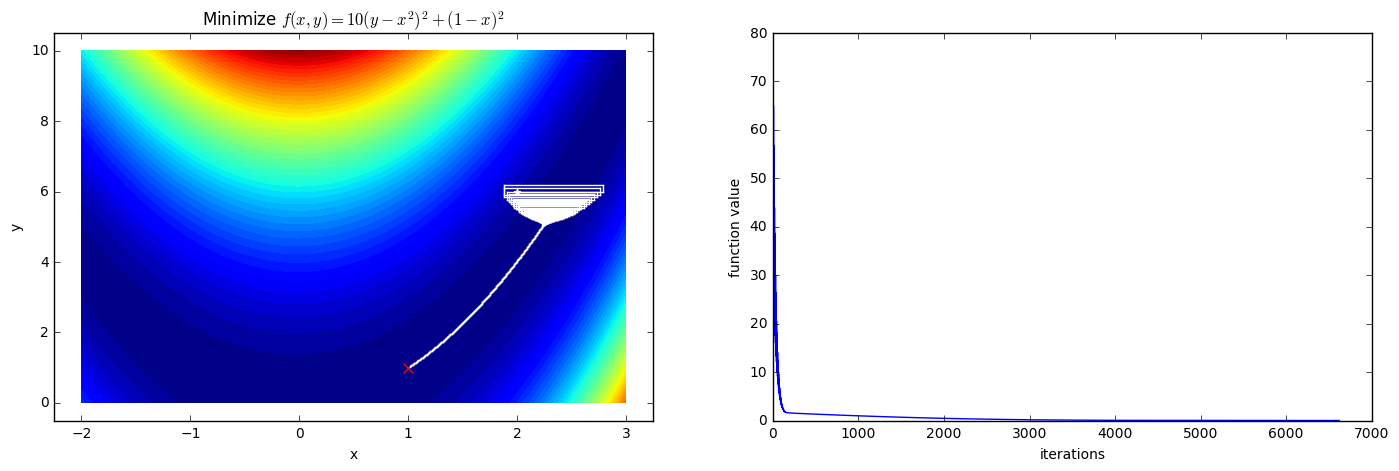

In [101]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
contourplot(objfun, -2,3,0,10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Minimize $f(x,y)=10(y-x^2)^2 + (1-x)^2$");
plt.scatter(p[0,0],p[0,1],marker="*",color="w")
for i in range(1,len(p)):    
        plt.plot( (p[i-1,0],p[i,0]), (p[i-1,1],p[i,1]) , "w");

plt.subplot(1,2,2)
plt.plot(f)
plt.xlabel("iterations")
plt.ylabel("function value");

In general, the convergence depends sensitively on the $\alpha$ value as well as the local gradient value at the initial position. You can play with various initial positions and step lengths to see how it works.

In [98]:
p, f = coordinatedescent(objfun, gradient, init=[2,5.1155], steplength=0.01)

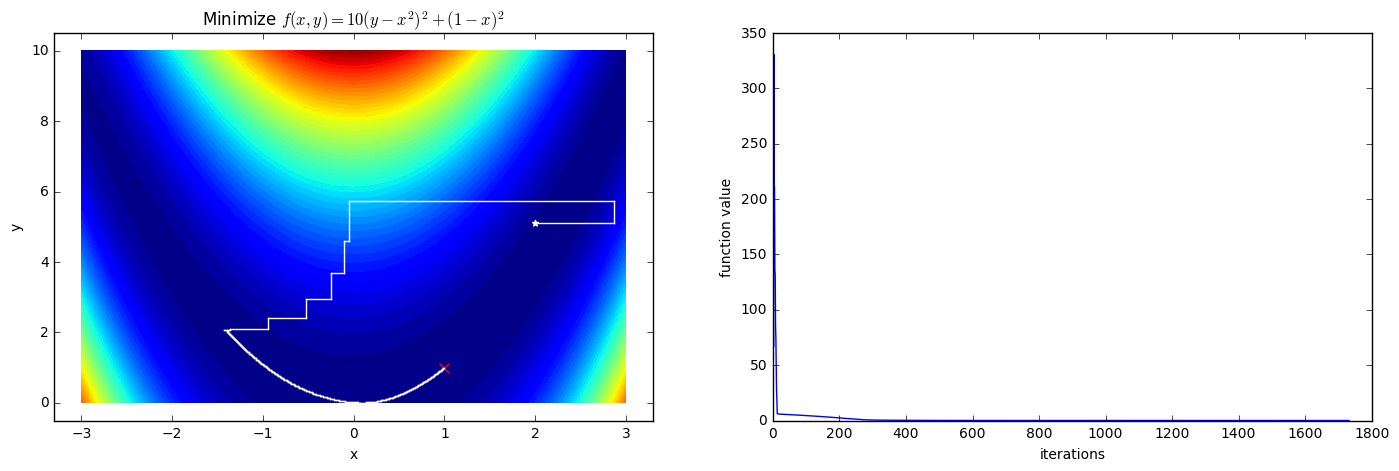

In [99]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
contourplot(objfun, -3,3,0,10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Minimize $f(x,y)=10(y-x^2)^2 + (1-x)^2$");
plt.scatter(p[0,0],p[0,1],marker="*",color="w")
for i in range(1,len(p)):    
        plt.plot( (p[i-1,0],p[i,0]), (p[i-1,1],p[i,1]) , "w");

plt.subplot(1,2,2)
plt.plot(f)
plt.xlabel("iterations")
plt.ylabel("function value");